# Decision Boundary on Iris Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [2]:
# load data and split into features, targets
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X = iris[:,0:4]      
y = iris[:,4]

## Decision Boundary

You need to run kNN with $k =1, 5, 15, 20$ and examine the decision boundary. A simple way to visualize the decision boundary is to use only two features and to draw 10000 data points on a uniform 100 x 100 grid in the square $$(x, y) \in [0, 1]\times [0, 1]$$ and classify them using the kNN classifier on these two features. Then, plot the data points with different markers corresponding to different classes.  Repeat this process for all $k$ and discuss the smoothness of the decision boundaries as k increases.

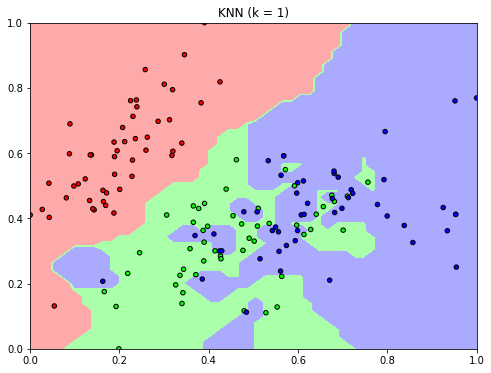

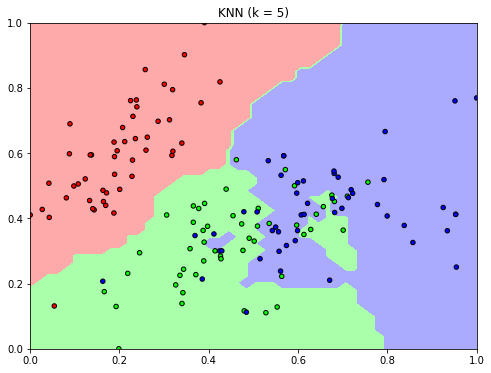

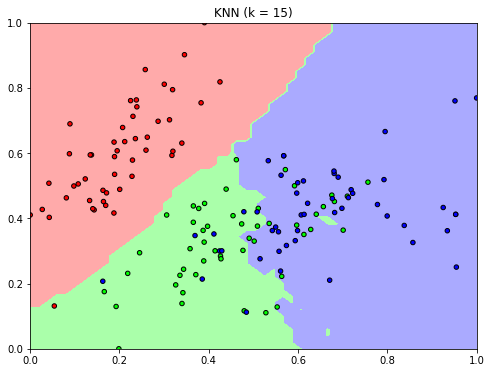

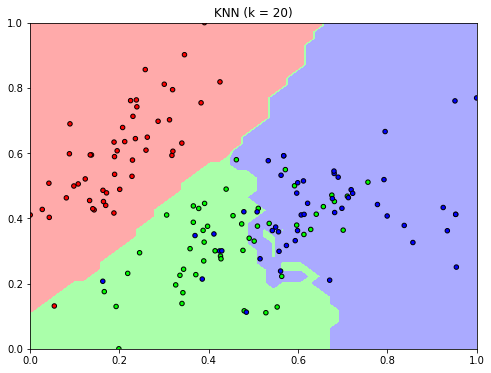

In [3]:
# For visualization in 2D, we only take the first two features. 
X = X[:, :2]

# standardization to scale the data to the [0, 1] range
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

# Colors to draw the real target and the contours
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"]) # contour colors 
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])  # target colors

# Create a mesh grid of 10000 points in 100 by 100 grid using np.meshgrid
# Write your code here 
nx, ny = (100, 100)
xgrid = np.linspace(0, 2, nx)
ygrid = np.linspace(0, 2, ny)
xv, yv = np.meshgrid(xgrid, ygrid)

for k in [1,5,15,20]:  
    
    # 1- Train a KNN with k neigbors on X_minmax and y using KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_minmax, y)
    
    # 2- Use the trained KNN to predict the 10000 points in your meshgrid
    
    #i was having issued with list shapes so I looked into how to resize a meshgrid list,
    # i learned that you can slice it using np.c_ and ravel as shown before
    # as for reshape, I was having errors regarding the expected dimensions for the contour, so reshape is used. 
    # i used the following source for guidance for these two lines
    # https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
    
    
    zv = neigh.predict(np.c_[xv.ravel(), yv.ravel()])
    zv = zv.reshape(xv.shape)
    
    # 3- Put the result into a color plot using plt.contourf and plt.scatter
    plt.figure(figsize=(8, 6))
    
    # Write the code for the contour 
    plt.contourf(xv, yv, zv, cmap = cmap_light)
    plt.scatter(X_minmax[:, 0], X_minmax[:, 1], c=y, cmap=cmap_bold, s=20, edgecolor="k")
    
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("{} (k = {})".format("KNN", k))
    
    
    
plt.show() 